In [14]:
import numpy as np
import cv2
import matplotlib.pylab as plt

In [15]:
img = cv2.imread('data/lena.png')

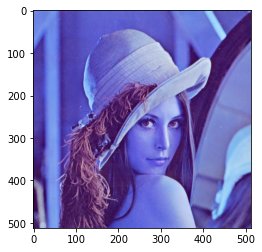

In [27]:
plt.imshow(img)
plt.show()

In [16]:
height, width, channel = img.shape

In [17]:
bgr = img.astype(np.float)/255.0

<ipython-input-17-c7e22173120b>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bgr = img.astype(np.float)/255.0


In [18]:
b, g, r = cv2.split(bgr)

In [19]:
h = np.zeros((height, width), dtype=np.float)
s = np.zeros((height, width), dtype=np.float)

<ipython-input-19-9624743cb6c1>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  h = np.zeros((height, width), dtype=np.float)
<ipython-input-19-9624743cb6c1>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  s = np.zeros((height, width), dtype=np.float)


In [20]:
v = np.max(bgr, axis=2)

In [21]:
for i in range(height):
    for j in range(width):
        if v[i][j] == 0:
            h[i][j] = 0
            s[i][j] = 0
        else:
            min_rgb = min(bgr[i][j])
            
            s[i][j] = 1 - (min_rgb / v[i][j])
            
            if v[i][j] == r[i][j]:
                h[i][j] = 60 * (g[i][j] - b[i][j]) / (v[i][j] - min_rgb)
            elif v[i][j] == g[i][j]:
                h[i][j] = 120 + (60 * (b[i][j] - r[i][j])) / (v[i][j] - min_rgb)
            elif v[i][j] == b[i][j]:
                h[i][j] = 240 + (60 * (r[i][j] - g[i][j])) / (v[i][j] - min_rgb)
            if h[i][j] < 0:
                h[i][j] += 360
            h[i][j] /= 360



In [24]:
hsv = (np.dstack((h, s, v)) * 255).astype(np.uint8)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h2, s2, v2 = cv2.split(hsv)
cv2.imshow('hsv2', hsv)
cv2.imshow('h2', h2)
cv2.imshow('s2', s2)
cv2.imshow('v2', v2)

cv2.waitKey(0)


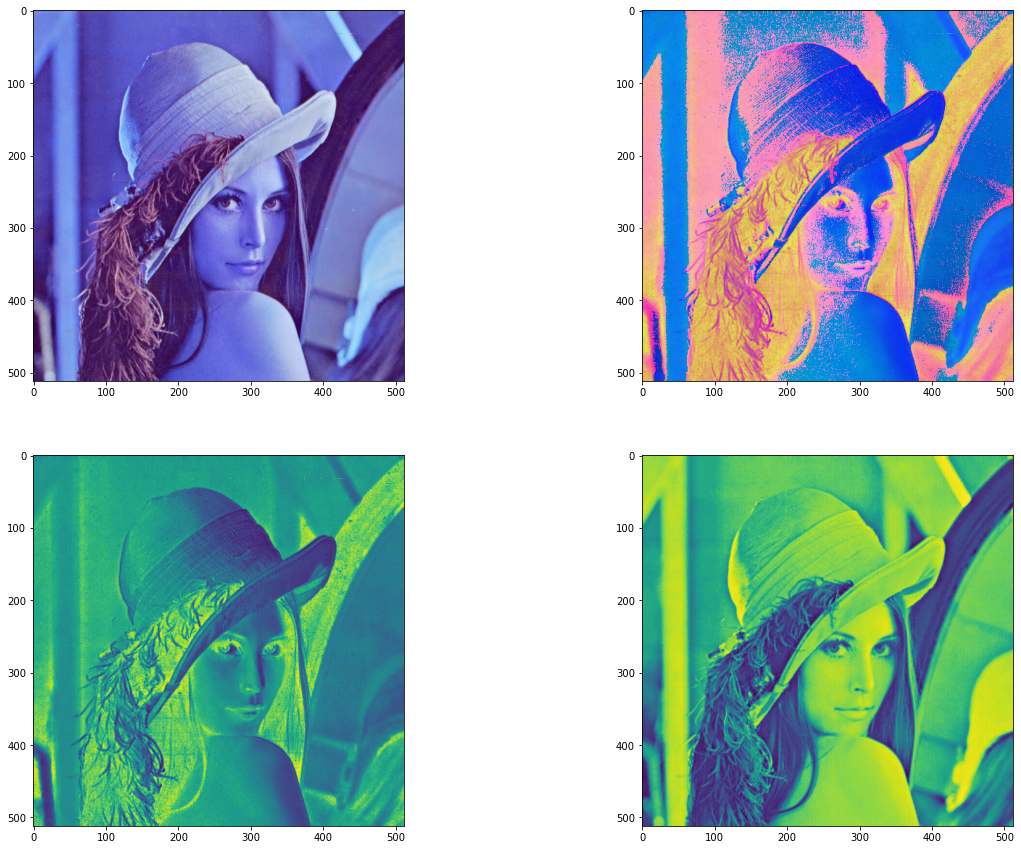

In [25]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
ax[0][0].imshow(img)
ax[0][1].imshow(hsv)
ax[1][0].imshow(s)
ax[1][1].imshow(v)
plt.show()